# Aim: 
To predict the house prices in the test data set </p> 

This was my first time using python for data exploration and analysis. As such, there is minimal commenting and it is probably quite hard to follow.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from scipy.stats import pearsonr, spearmanr, f_oneway, skew
%matplotlib inline

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge


# changing pandas options to display all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

In [5]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
test[['MSSubClass', 'OverallQual', 'OverallCond']] = test[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [8]:
data['AgeRemod'] = data['YearRemodAdd'] - data['YearBuilt']
data['AgeSold'] = data['YrSold'] - data['YearBuilt']
test['AgeRemod'] = test['YearRemodAdd'] - test['YearBuilt']
test['AgeSold'] = test['YrSold'] - test['YearBuilt']
data['GarageYr'] = data['GarageYrBlt'] - data['YearBuilt']
test['GarageYr'] = test['GarageYrBlt'] - test['YearBuilt']
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']


In [9]:
test.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AgeRemod,AgeSold,GarageYr,TotalSF
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1381.000000,1458.000000
mean,2190.000000,68.580357,9819.161069,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,12.305003,36.411926,4.904417,2529.022634
std,421.321334,22.376841,4955.517327,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,23.638064,30.432248,15.930769,787.070989
min,1461.000000,21.000000,1470.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-1.000000,-1.000000,-20.000000,612.000000
25%,1825.500000,58.000000,7391.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,7.000000,0.000000,1986.500000
50%,2190.000000,67.000000,9399.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,34.000000,0.000000,2429.000000
75%,2554.500000,80.000000,11517.500000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,13.000000,55.000000,0.000000,2976.000000
max,2919.000000,200.000000,56600.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,127.000000,129.000000,201.000000,10190.000000


Some features have a lot of missing variables (>50%). Need to check if that is because missing means that isn't in the house.  

Alley - NA means there is no alley access.  
FireplaceQU - NA means there is no fireplace.  
PoolQC - NA means there is no pool.  
Fence - NA means there is no fence.   
MiscFeature - NA means there is no misc features.  

For all of these features, i need to replace them with Na as they are categorical, not counts.




In [10]:
na_cat = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
data[na_cat] = data[na_cat].fillna('Na')
test[na_cat] = test[na_cat].fillna('Na')

In [11]:
data.drop(columns = 'Id', inplace = True)
test.drop(columns = 'Id', inplace = True)


In [12]:
target = data['SalePrice']
target


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

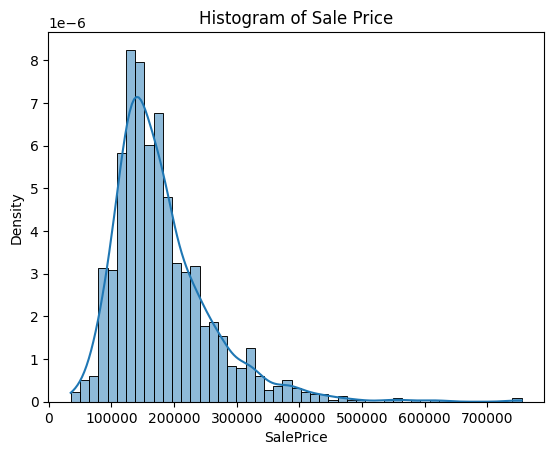

In [13]:
sns.histplot(target, kde = True, stat = 'density')
plt.title('Histogram of Sale Price')
plt.show;

Sale Price is positively skewed so needs to be transformed

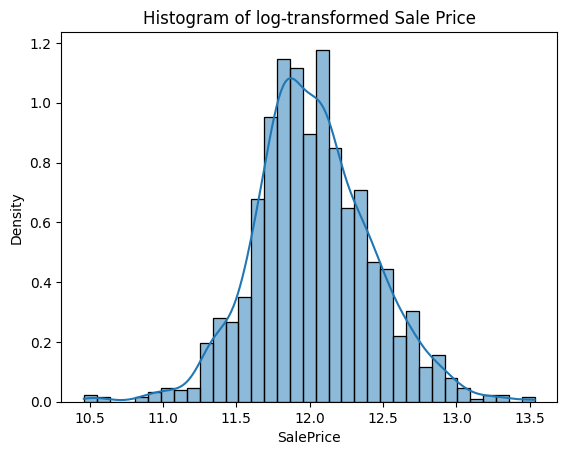

In [14]:
target_normal = np.log(target)
sns.histplot(target_normal, kde = True, stat = 'density')
plt.title('Histogram of log-transformed Sale Price')
plt.show;

Transformation corrected the positive skew  
Still got some outliers though

In [15]:
target_n = target_normal.to_frame().rename(columns = {'SalePrice': 'Log_SalePrice'})
target_n

,Log_SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [16]:
data = pd.concat([data, target_n], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

for the missing data, it is worth seeing whether missing data predicts house prices 

In [17]:
continuous = data.select_dtypes(include = ['int64', 'float64'])
continuous.shape
categorical = data.select_dtypes(include = ['object'])
categorical = pd.concat([categorical, data['Log_SalePrice']], axis = 1)
continuous.drop(columns = 'SalePrice', inplace = True)

In [18]:
skewness = skew(continuous)
continuous_skew = pd.DataFrame({'Variable': continuous.columns, 'skewness': skewness})
continuous_skew

,Variable,skewness
0,LotFrontage,NaN
1,LotArea,12.195142
2,YearBuilt,-0.612831
3,YearRemodAdd,-0.503044
4,MasVnrArea,NaN
5,BsmtFinSF1,1.683771
6,BsmtFinSF2,4.250888
7,BsmtUnfSF,0.919323
8,TotalBsmtSF,1.522688
9,1stFlrSF,1.375342


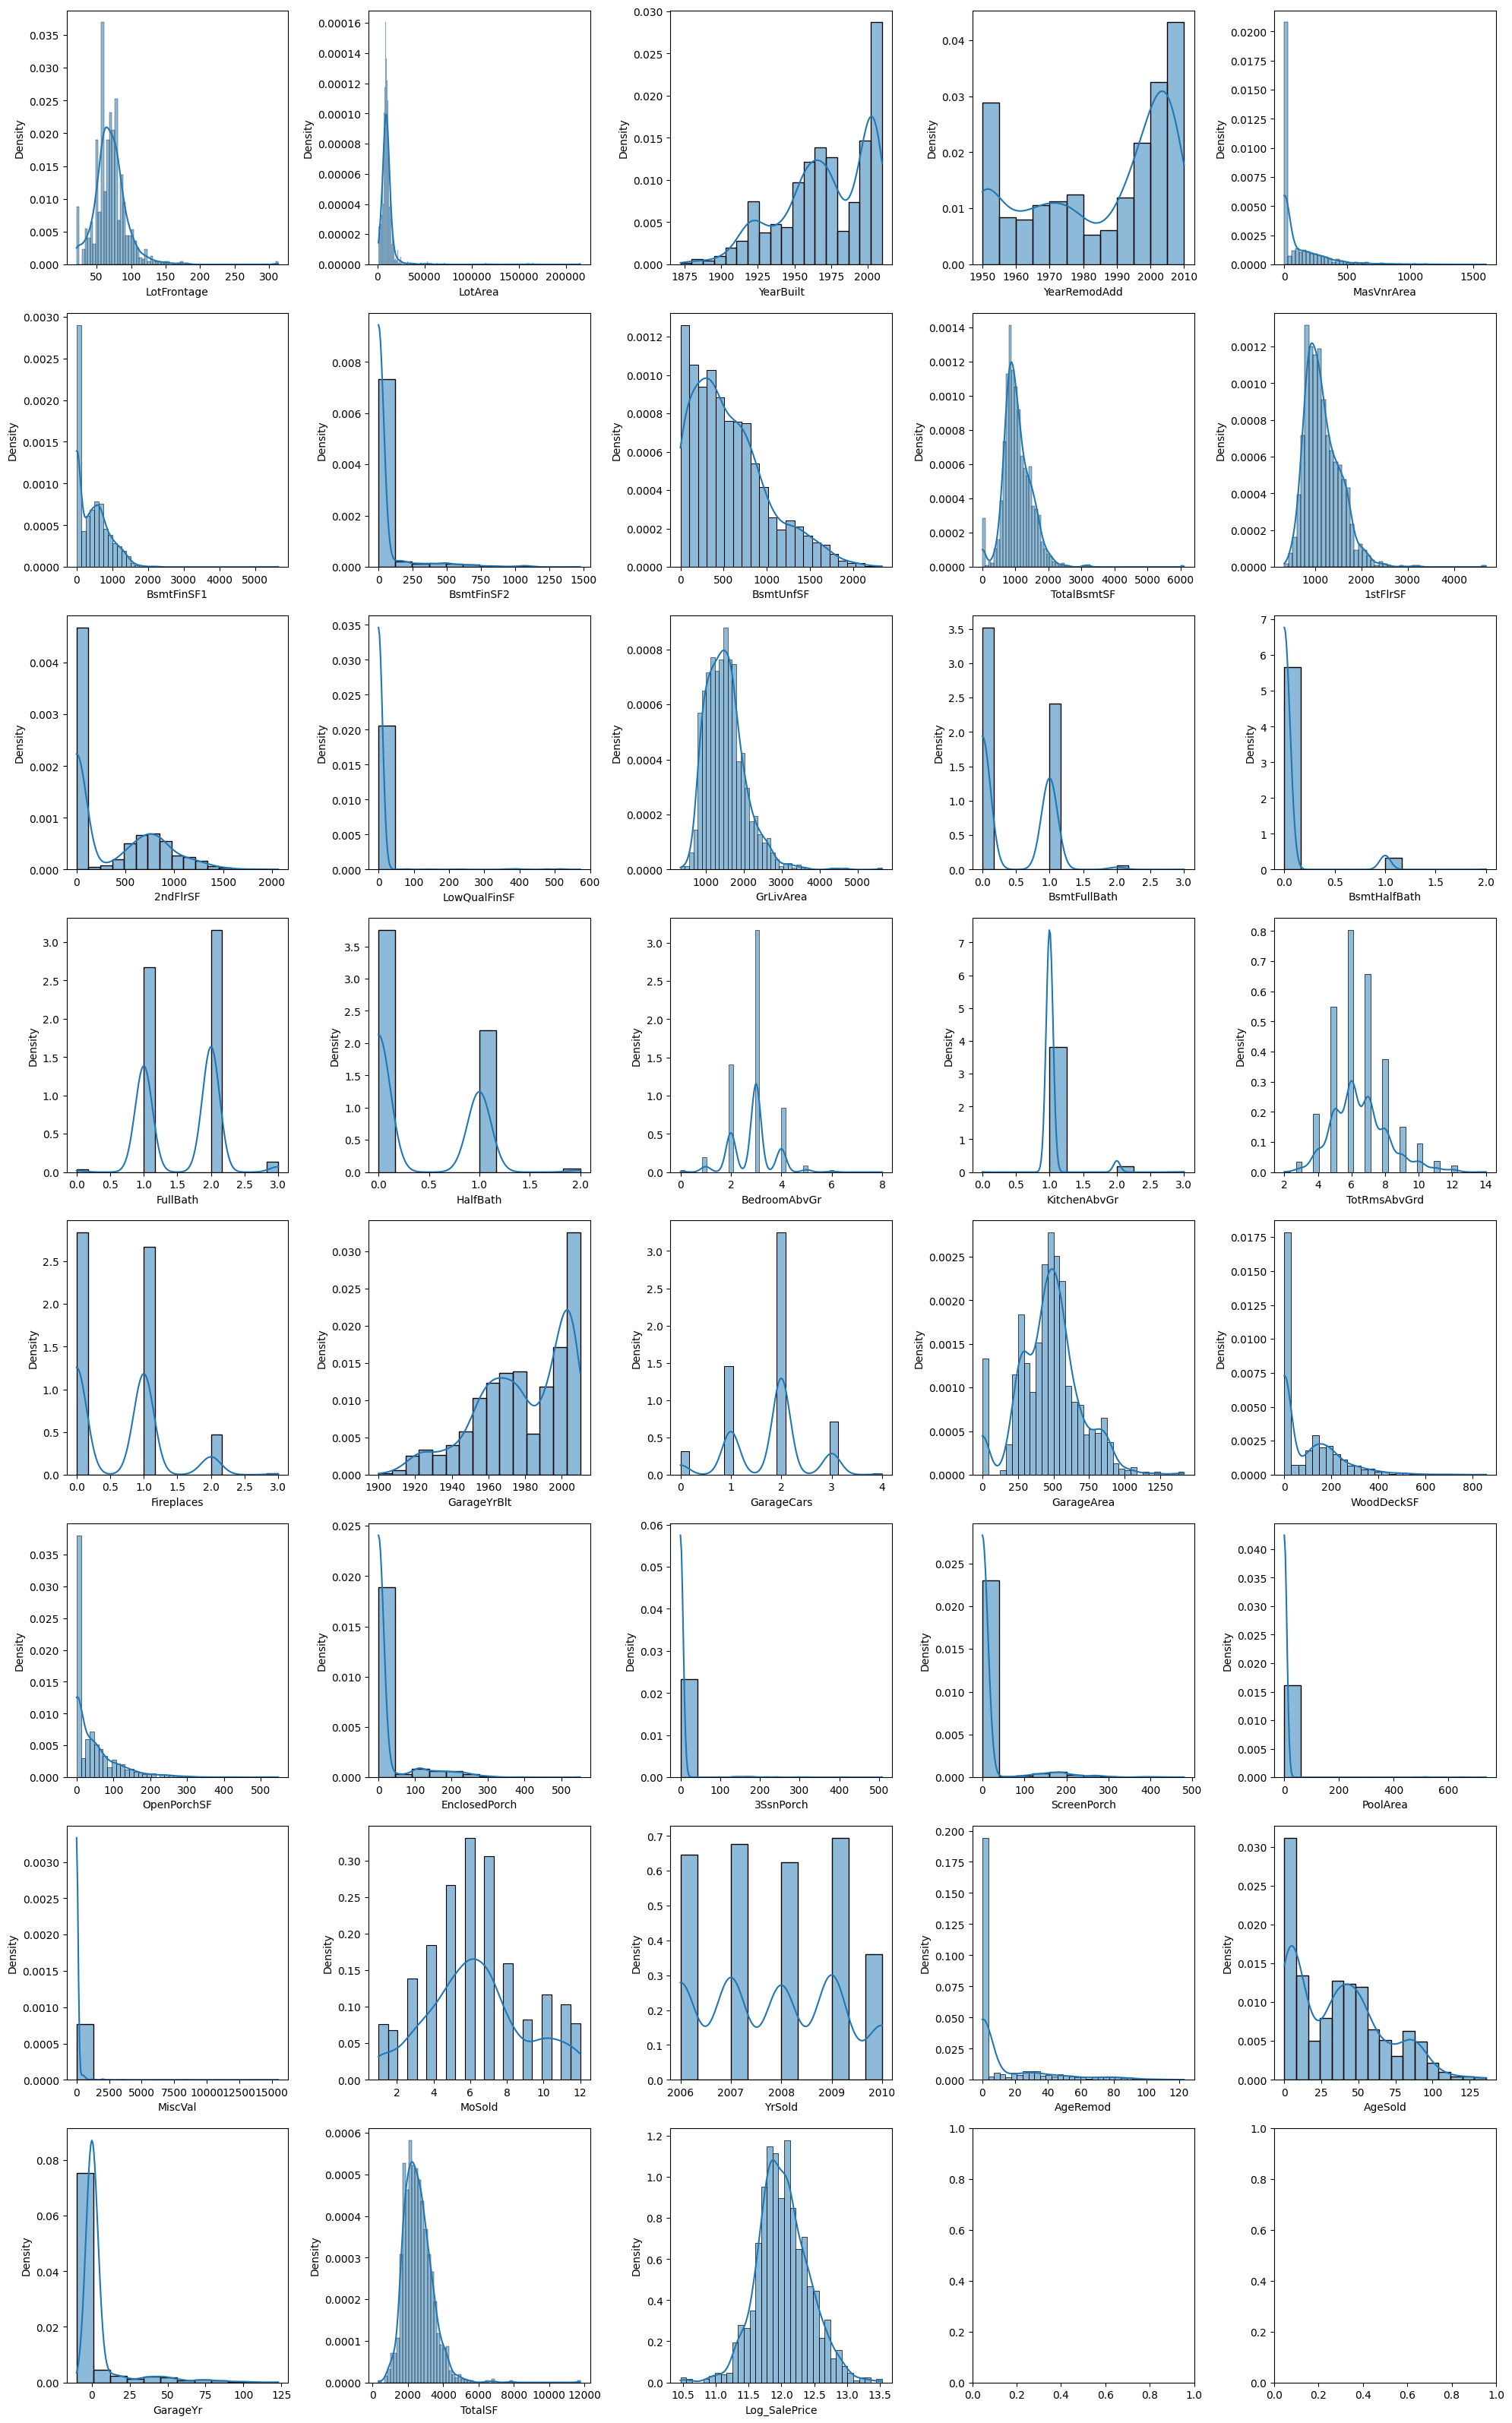

In [19]:
ncols = 5
nrows = round(len(continuous.columns)/ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (20, nrows * 4), dpi = 100)

for id, col in enumerate(continuous):
    chart = sns.histplot(data = continuous, x = col, ax = ax[id//ncols, id%ncols], stat = 'density', kde = True)

plt.tight_layout()
plt.show()

In [20]:
transform = continuous_skew[continuous_skew.skewness > 1]
transform = pd.concat([transform, continuous_skew[continuous_skew.skewness.isnull()]], axis = 0)
transform = transform.Variable.values.tolist()
transform

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'AgeRemod',
 'TotalSF',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'GarageYr']

In [21]:
continuous[transform] = np.log1p(continuous[transform])
data[transform] = np.log1p(data[transform]) 
test[transform] = np.log1p(test[transform]) 

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwa

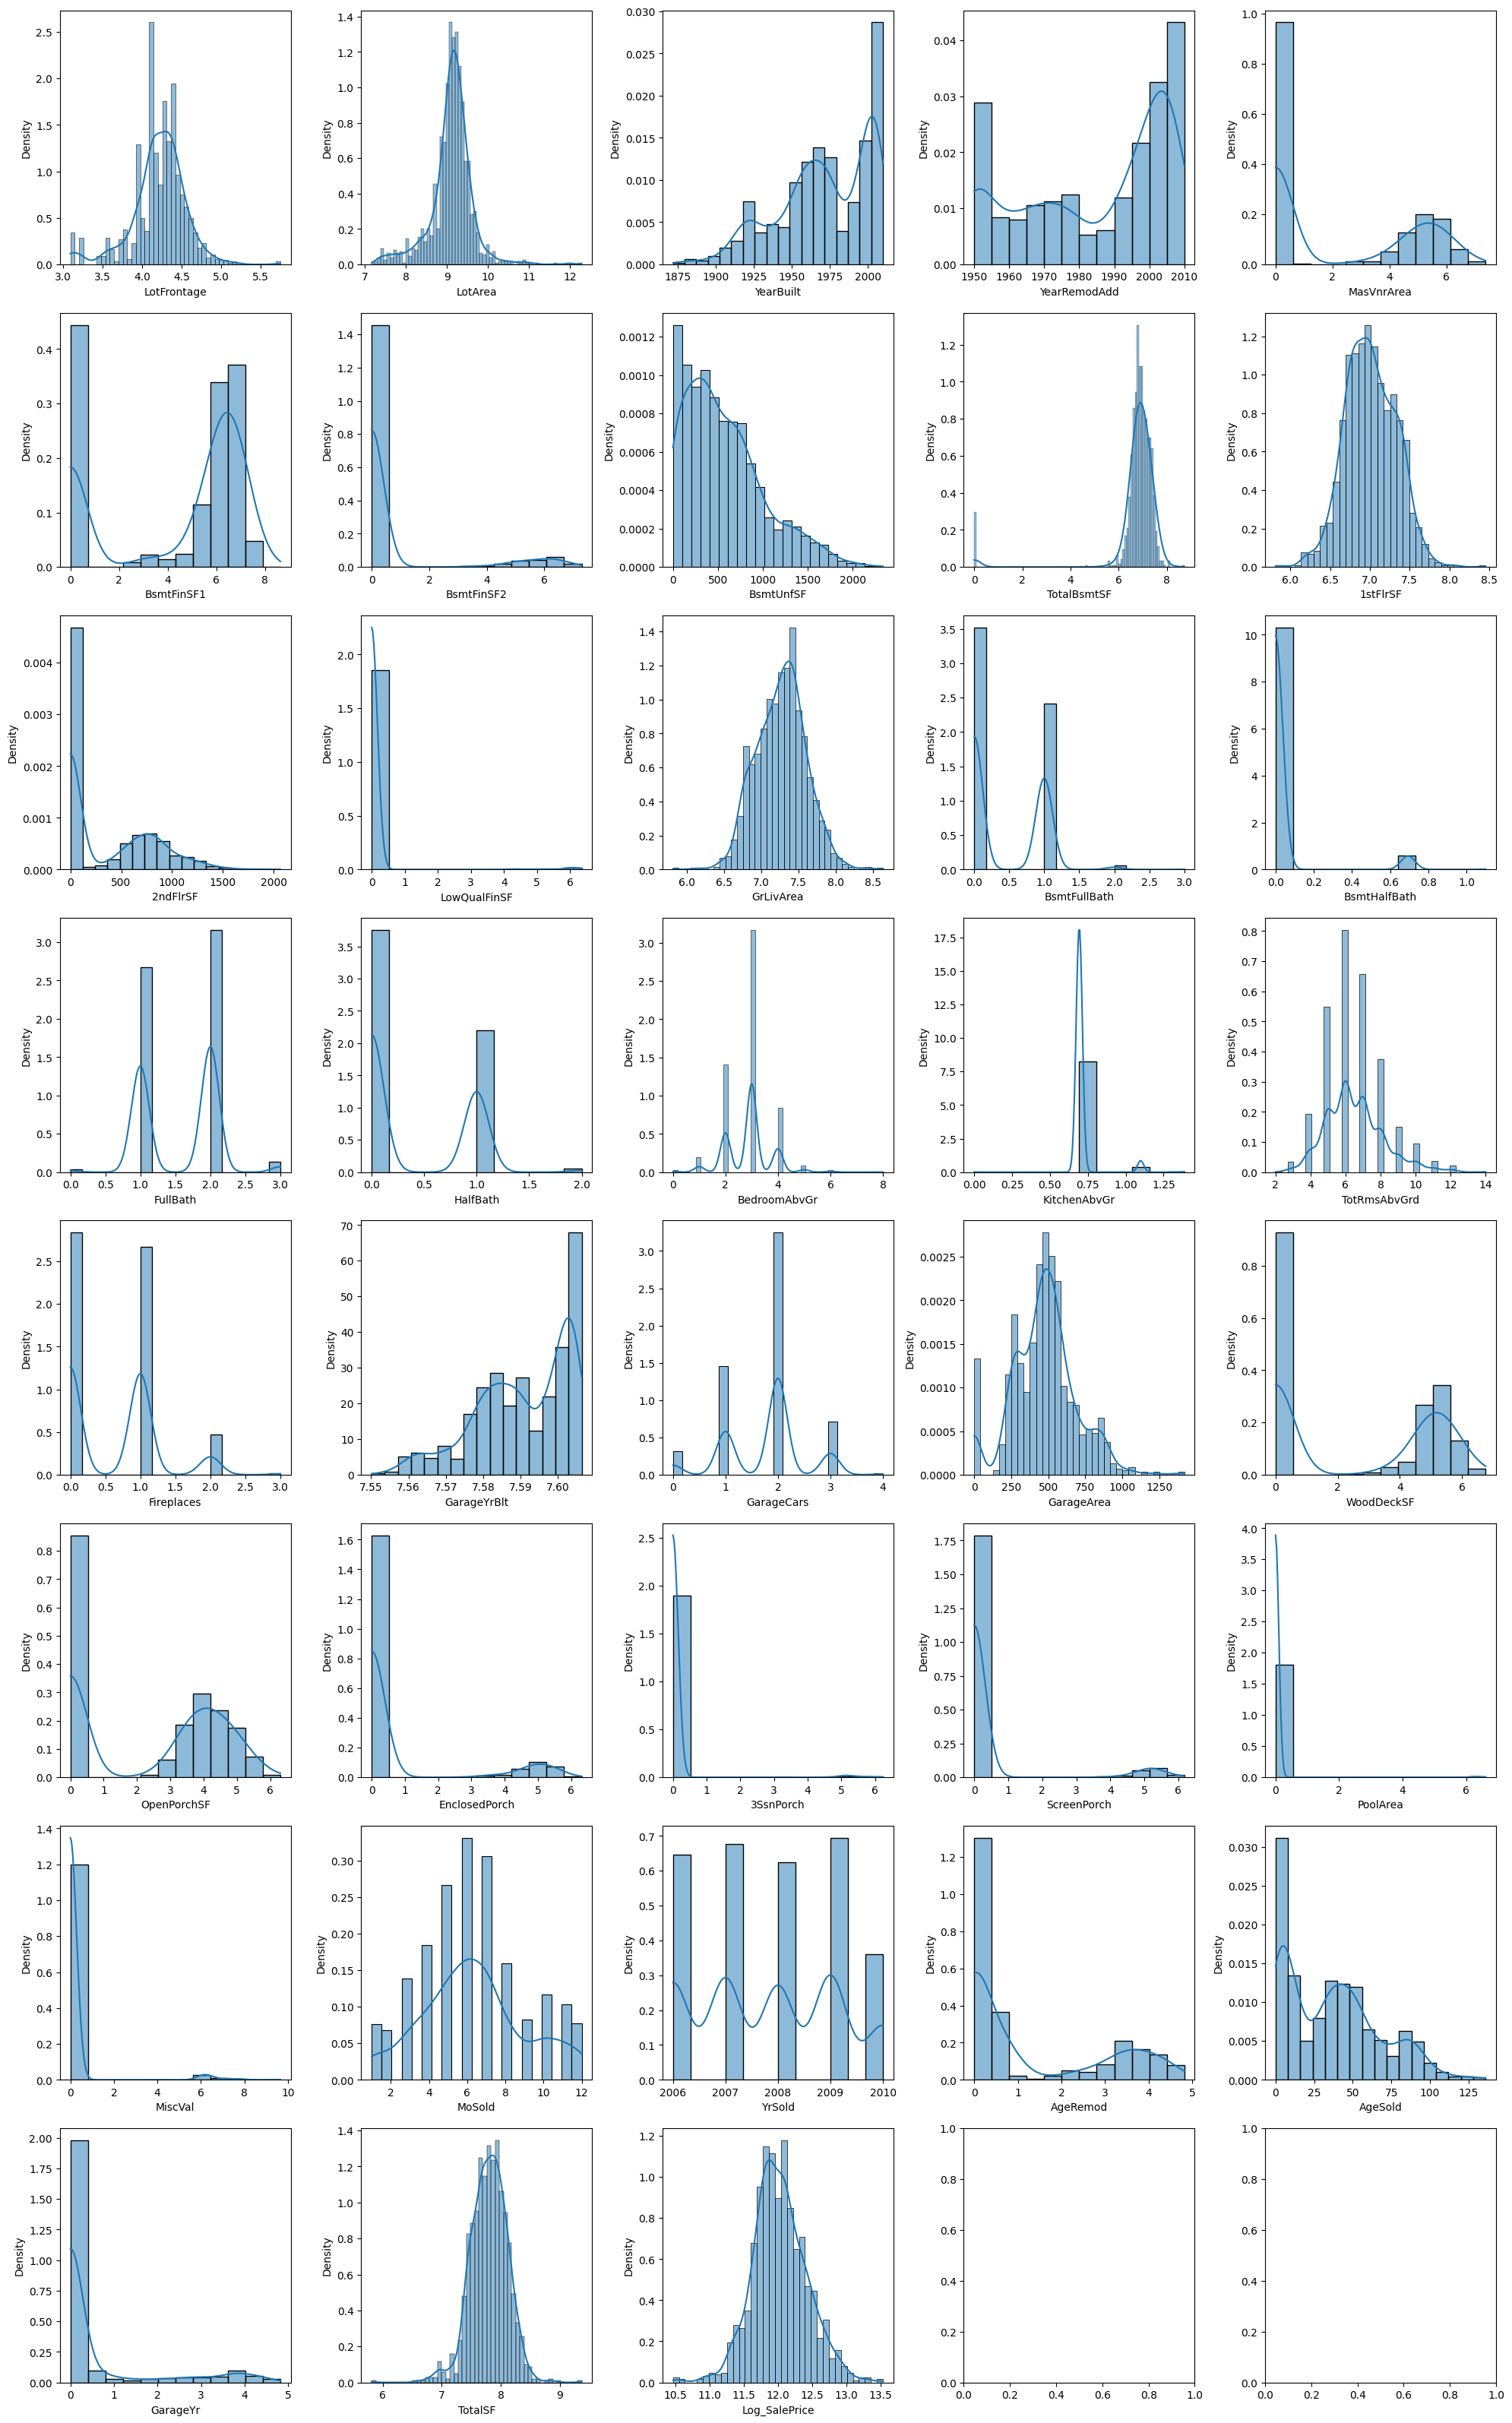

In [22]:
ncols = 5
nrows = round(len(continuous.columns)/ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (20, nrows * 4), dpi = 100)

for id, col in enumerate(continuous):
    chart = sns.histplot(data = continuous, x = col, ax = ax[id//ncols, id%ncols], stat = 'density', kde = True)

plt.tight_layout()
plt.show()

In [23]:
print('Train Features Missing (%)')
print((data.isnull().mean()[data.isnull().mean() != 0] * 100).sort_values(ascending = False))
print('\n')
print('Test Features Missing (%)')
print((test.isnull().mean()[test.isnull().mean() != 0] * 100).sort_values(ascending = False))

Train Features Missing (%)
MasVnrType      59.726027
LotFrontage     17.739726
GarageYr         5.958904
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


Test Features Missing (%)
MasVnrType      61.274846
LotFrontage     15.558602
GarageYr         5.688828
GarageCond       5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
Utilities        0.137080
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
SaleType         0.068540
GarageArea       0.0

Impute missing data dependent upon variable type. If numerical, impute via median. If categorical and couht, impute via mode.  

Lotfrontage replaced via median.
GarageFinish/Cond/Type/Qual replaced with Na
GarageYrBuilt replaced with 0  
BsmTFinType2/Exposure/FinType1/Qual/Cond replaced with Na  
MasVnrArea replaced with median  
masvnrType replaced with mode
electrical replaced with mode.

Dataframe containing the remaining columns that have missing values. Will see how this affects sale price.  
For example, are the missing values in the columns associated with higher sale prices?

In [24]:
# Replacing categorical and count variables with na or 0 if they are not present in the house. This can be found on the data description.

na_cat = ['GarageFinish', 'GarageCond', 'GarageType', 'GarageQual', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual']
data[na_cat] = data[na_cat].fillna('Na')
test[na_cat] = test[na_cat].fillna('Na')
na_count = 'GarageYrBlt'
data[na_count] = data[na_count].fillna('0')
test[na_count] = test[na_count].fillna('0')

In [25]:
# Replacing categorical and count variables with na or 0 if they are not present in the house. This can be found on the data description.

na_cat = ['Utilities', 'MSZoning', 'Functional', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'KitchenQual', 'SaleType']
test[na_cat] = test[na_cat].fillna('Na')
na_count = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']
test[na_count] = test[na_count].fillna('0')

In [26]:
train_s = data.copy()
test_s = test.copy()
train_s.drop(columns = ['SalePrice', 'Log_SalePrice','MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2'], inplace = True)
test_s.drop(columns = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2'], inplace = True)


In [27]:
cont_variables = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeRemod', 'AgeSold', 'TotalSF']
count_variables = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
variables = cont_variables + count_variables


In [28]:
train_s.replace([np.inf, -np.inf], 0, inplace = True)
test_s.replace([np.inf, -np.inf], 0, inplace = True)

In [29]:
test_s.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeRemod,AgeSold,GarageYr,TotalSF
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1376.000000,1458.000000
mean,57.378341,4.185516,9.078854,6.078821,5.553804,2.059358,554.294925,6.715696,6.999917,325.967786,0.054371,7.254488,1.570939,0.377656,2.854010,0.709983,6.385195,0.58122,472.768861,2.442117,2.357489,0.816893,0.046702,0.491784,0.024288,0.236078,1.149781,36.411926,0.487689,7.788730
std,42.746880,0.355141,0.501942,1.436812,1.113740,2.618529,437.260486,1.205857,0.327842,420.610226,0.557179,0.315917,0.555190,0.503017,0.829788,0.087132,1.508895,0.64742,217.048611,2.589094,2.156551,1.814052,0.493994,1.513738,0.379828,1.254650,1.599003,30.432248,1.179188,0.312155
min,20.000000,3.091042,7.293698,1.000000,1.000000,0.000000,0.000000,0.000000,6.011267,0.000000,0.000000,6.011267,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,6.418365
25%,20.000000,4.077537,8.908154,5.000000,5.000000,0.000000,219.250000,6.665684,6.773652,0.000000,0.000000,7.019744,1.000000,0.000000,2.000000,0.693147,5.000000,0.00000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,7.594633
50%,50.000000,4.219508,9.148465,6.000000,5.000000,0.000000,460.000000,6.896694,6.984716,0.000000,0.000000,7.267525,2.000000,0.000000,3.000000,0.693147,6.000000,0.00000,480.000000,0.000000,3.367296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,7.795646
75%,70.000000,4.394449,9.351710,7.000000,6.000000,5.105945,797.750000,7.174723,7.232372,676.000000,0.000000,7.451242,2.000000,1.000000,3.000000,0.693147,7.000000,1.00000,576.000000,5.129899,4.290459,0.000000,0.000000,0.000000,0.000000,0.000000,2.639057,55.000000,0.000000,7.998671
max,190.000000,5.303305,10.943782,10.000000,9.000000,7.163172,2140.000000,8.536211,8.536211,1862.000000,6.970730,8.536211,4.000000,2.000000,6.000000,1.098612,15.000000,4.00000,1488.000000,7.261927,6.610696,6.920672,5.888878,6.357842,6.685861,9.741027,4.852030,129.000000,5.308268,9.229260


In [30]:
train_s.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeRemod,AgeSold,GarageYr,TotalSF
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1373.000000,1460.000000
mean,56.897260,4.207109,9.110966,6.099315,5.575342,2.131946,567.240411,6.750560,7.008452,346.992466,0.099814,7.268512,0.425342,0.039486,1.565068,0.382877,2.866438,0.711673,6.517808,0.613014,1.767123,472.980137,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,1.245790,36.547945,0.545767,7.802886
std,42.300571,0.346228,0.517369,1.382997,1.112799,2.631265,441.866955,1.145712,0.317431,436.528436,0.747354,0.333303,0.518911,0.162599,0.550916,0.502885,0.815778,0.089268,1.625393,0.644666,0.747315,213.804841,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,1.646375,30.250152,1.231883,0.313416
min,20.000000,3.091042,7.170888,1.000000,1.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131
25%,20.000000,4.094345,8.929898,5.000000,5.000000,0.000000,223.000000,6.680541,6.783325,0.000000,0.000000,7.030415,0.000000,0.000000,1.000000,0.000000,2.000000,0.693147,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.606139
50%,50.000000,4.248495,9.156887,6.000000,5.000000,0.000000,477.500000,6.900227,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,2.000000,0.000000,3.000000,0.693147,6.000000,1.000000,2.000000,480.000000,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,7.813996
75%,70.000000,4.394449,9.358976,7.000000,6.000000,5.117994,808.000000,7.169542,7.238676,728.000000,0.000000,7.483104,1.000000,0.000000,2.000000,1.000000,3.000000,0.693147,7.000000,1.000000,2.000000,576.000000,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,3.044522,54.000000,0.000000,8.008033
max,190.000000,5.749393,12.279537,10.000000,9.000000,7.378384,2336.000000,8.717846,8.453827,2065.000000,6.350886,8.638171,3.000000,1.098612,3.000000,2.000000,8.000000,1.386294,14.000000,3.000000,4.000000,1418.000000,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,4.820282,136.000000,4.820282,9.371864


In [31]:
scaler = RobustScaler()
train_s[variables] = scaler.fit_transform(train_s[variables])
test_s[variables] = scaler.fit_transform(test_s[variables])
target_scaled = scaler.fit_transform(target_n)

In [32]:
train_s.drop(columns = ['EnclosedPorch', 'MiscVal', 'GarageYr','AgeRemod'], inplace = True)
test_s.drop(columns = ['EnclosedPorch', 'MiscVal', 'GarageYr', 'AgeRemod'], inplace = True)


In [33]:
train_s = pd.get_dummies(train_s)
test_s = pd.get_dummies(test_s)

In [34]:
print('Train Features Missing (%)')
print((train_s.isnull().mean()[train_s.isnull().mean() != 0] * 100).sort_values(ascending = False))
print('\n')
print('Test Features Missing (%)')
print((test_s.isnull().mean()[test_s.isnull().mean() != 0] * 100).sort_values(ascending = False))

Train Features Missing (%)
LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64


Test Features Missing (%)
LotFrontage    15.558602
MasVnrArea      1.028101
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
GarageArea      0.068540
TotalSF         0.068540
dtype: float64


In [35]:
imputer = KNNImputer(n_neighbors = 5)
train_s = pd.DataFrame(imputer.fit_transform(train_s), columns = train_s.columns)
test_s = pd.DataFrame(imputer.fit_transform(test_s), columns = test_s.columns)

In [36]:
print('Train Features Missing (%)')
print((train_s.isnull().mean()[train_s.isnull().mean() != 0] * 100).sort_values(ascending = False))
print('\n')
print('Test Features Missing (%)')
print((test_s.isnull().mean()[test_s.isnull().mean() != 0] * 100).sort_values(ascending = False))

Train Features Missing (%)
Series([], dtype: float64)


Test Features Missing (%)
Series([], dtype: float64)


In [37]:
final_train, final_test = train_s.align(test_s, join = 'left', axis = 1)
#final line of code joins the dataframes and makes sure there are no missed coluns for one hot encoding

In [38]:
final_test = final_test.fillna(0)
final_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,AgeSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Na,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Na,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Na,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Na,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Na,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Na,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Na,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,GarageFinish_Fin,GarageFinish_Na,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,G

No more missing data for either test or training. Now move onto subsetting data, looking at individuals correlations and statistics, and removing outliers.

In [39]:
model = Ridge(alpha = 10)
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, final_train, target_scaled, scoring = 'neg_mean_squared_error', cv = cv)
print(np.mean(scores))

-0.06628781957694027


In [40]:
model.fit(final_train, target_scaled)

Ridge(alpha=10)

In [41]:
test_predict = model.predict(final_test)
test_predict = pd.DataFrame(test_predict, index = final_test.index.astype(int), columns = ['Log_SalePrice'])
scaler.fit(target_n)
test_predict['Normal'] = scaler.inverse_transform(test_predict)
test_predict['SalePrice'] = np.exp(test_predict['Normal'])
test_predict.drop(columns = ['Normal', 'Log_SalePrice'], inplace = True)
test_predict

,SalePrice
0,119611.379383
1,162334.307792
2,184944.086001
3,200194.898134
4,200932.437944
...,...
1454,89214.486519
1455,81539.514695
1456,166963.796640
1457,118091.769824


In [45]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = test_predict['SalePrice']
submission.to_csv('submission.csv', index = False)